In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

In [3]:
#read in most updated tweets from elon musk, filtered using keywords such as tesla
elon = pd.read_csv("../../data/twitter/elon_main_2019_05_17.csv")
elon.head(30)

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,keyword
0,0,2019-04-14 23:31:00+00:00,107,4213,starship will land on a ring of fire,1117571159195668480,NaN,True,jasonsellspa,1.117564e+18,False
1,1,2019-04-14 23:10:00+00:00,83,4981,6.5,1117565769829818368,NaN,True,JaneidyEve,1.117564e+18,False
2,2,2019-04-14 23:06:00+00:00,61,4041,yes,1117564774190075904,NaN,True,Johankyu7,1.117564e+18,False
3,3,2019-04-14 23:02:00+00:00,10739,117153,winter is coming,1117563769159286784,NaN,False,NaN,1.117564e+18,False
4,4,2019-04-14 23:01:00+00:00,12245,162803,thinking about adding giant stainless steel dr...,1117563679099240449,NaN,False,NaN,1.117564e+18,False
5,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18,True
6,6,2019-04-14 22:46:00+00:00,65,2181,deal,1117559770955812865,NaN,True,yourloyalpal,1.117554e+18,False
7,7,2019-04-14 22:21:00+00:00,4864,54282,please support my campaign to rebrand @ wsj as...,1117553530615648256,🧦,False,NaN,1.117554e+18,False
8,8,2019-04-14 22:17:00+00:00,2073,42205,"at some point, @ theonion and i should just a ...",1117552423373918208,NaN,False,NaN,1.117552e+18,False
9,9,2019-04-14 22:14:00+00:00,177,1979,just use this handy guidehttps://www.theonion....,1117551672039841793,NaN,True,techreview,1.117533e+18,False


In [4]:
type(elon["Datetime"])

pandas.core.series.Series

In [5]:
#obtaining "Datetime", year, month, day, date and day of week columns 
elon["Datetime"]=pd.to_datetime(elon["Datetime"],utc=False)


elon['year']= elon['Datetime'].dt.year
elon['month']=elon['Datetime'].dt.month
elon['day']=elon['Datetime'].dt.day
elon['date']=elon['Datetime'].dt.date
elon['DayofWeek']=elon['Datetime'].dt.weekday



In [6]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 16 columns):
Unnamed: 0    6251 non-null int64
Datetime      6251 non-null datetime64[ns, UTC]
retweets      6251 non-null int64
favorites     6251 non-null int64
text          6251 non-null object
id            6251 non-null object
emoji         186 non-null object
isreply       6242 non-null object
replyto       3950 non-null object
origin        6242 non-null float64
keyword       6251 non-null bool
year          6251 non-null int64
month         6251 non-null int64
day           6251 non-null int64
date          6251 non-null object
DayofWeek     6251 non-null int64
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(7), object(6)
memory usage: 738.7+ KB


In [7]:
#created "weekend" for whether a tweet was published during the weekend
elon["Weekend"] = elon["DayofWeek"]>=5

In [8]:
elon.head(20)

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,keyword,year,month,day,date,DayofWeek,Weekend
0,0,2019-04-14 23:31:00+00:00,107,4213,starship will land on a ring of fire,1117571159195668480,NaN,True,jasonsellspa,1.117564e+18,False,2019,4,14,2019-04-14,6,True
1,1,2019-04-14 23:10:00+00:00,83,4981,6.5,1117565769829818368,NaN,True,JaneidyEve,1.117564e+18,False,2019,4,14,2019-04-14,6,True
2,2,2019-04-14 23:06:00+00:00,61,4041,yes,1117564774190075904,NaN,True,Johankyu7,1.117564e+18,False,2019,4,14,2019-04-14,6,True
3,3,2019-04-14 23:02:00+00:00,10739,117153,winter is coming,1117563769159286784,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6,True
4,4,2019-04-14 23:01:00+00:00,12245,162803,thinking about adding giant stainless steel dr...,1117563679099240449,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6,True
5,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18,True,2019,4,14,2019-04-14,6,True
6,6,2019-04-14 22:46:00+00:00,65,2181,deal,1117559770955812865,NaN,True,yourloyalpal,1.117554e+18,False,2019,4,14,2019-04-14,6,True
7,7,2019-04-14 22:21:00+00:00,4864,54282,please support my campaign to rebrand @ wsj as...,1117553530615648256,🧦,False,NaN,1.117554e+18,False,2019,4,14,2019-04-14,6,True
8,8,2019-04-14 22:17:00+00:00,2073,42205,"at some point, @ theonion and i should just a ...",1117552423373918208,NaN,False,NaN,1.117552e+18,False,2019,4,14,2019-04-14,6,True
9,9,2019-04-14 22:14:00+00:00,177,1979,just use this handy guidehttps://www.theonion....,1117551672039841793,NaN,True,techreview,1.117533e+18,False,2019,4,14,2019-04-14,6,True


In [9]:
#obtained time column
elon['Time']=elon['Datetime'].dt.time

In [10]:
elon.head()


,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,keyword,year,month,day,date,DayofWeek,Weekend,Time
0,0,2019-04-14 23:31:00+00:00,107,4213,starship will land on a ring of fire,1117571159195668480,NaN,True,jasonsellspa,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:31:00
1,1,2019-04-14 23:10:00+00:00,83,4981,6.5,1117565769829818368,NaN,True,JaneidyEve,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:10:00
2,2,2019-04-14 23:06:00+00:00,61,4041,yes,1117564774190075904,NaN,True,Johankyu7,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:06:00
3,3,2019-04-14 23:02:00+00:00,10739,117153,winter is coming,1117563769159286784,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:02:00
4,4,2019-04-14 23:01:00+00:00,12245,162803,thinking about adding giant stainless steel dr...,1117563679099240449,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:01:00


In [11]:
#stock market opens from 13:30 to 20:00 in Universal Time
day_start="13:30:00"
day_end="20:00:00"

format_str = '%H:%M:%S' 
start = dt.datetime.strptime(day_start, format_str)
end = dt.datetime.strptime(day_end, format_str)
start_time=dt.datetime.strptime(day_start, '%H:%M:%S').time()
end_time=dt.datetime.strptime(day_end, '%H:%M:%S').time()



In [12]:
#create "BinaryTrading" column, where 1 indicates tweet was published during trading hours, 0 otherwise
elon["BinaryTrading"]=elon["year"]
for i in range(772):
    if elon["Weekend"][i]==1:
        elon["BinaryTrading"][i]=0
    elif (elon["Time"][i]<=end_time and elon["Time"][i]>=start_time):
        elon["BinaryTrading"][i]=1
    else:
        elon["BinaryTrading"][i]=0

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
elon.head(20)

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,keyword,year,month,day,date,DayofWeek,Weekend,Time,BinaryTrading
0,0,2019-04-14 23:31:00+00:00,107,4213,starship will land on a ring of fire,1117571159195668480,NaN,True,jasonsellspa,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:31:00,0
1,1,2019-04-14 23:10:00+00:00,83,4981,6.5,1117565769829818368,NaN,True,JaneidyEve,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:10:00,0
2,2,2019-04-14 23:06:00+00:00,61,4041,yes,1117564774190075904,NaN,True,Johankyu7,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:06:00,0
3,3,2019-04-14 23:02:00+00:00,10739,117153,winter is coming,1117563769159286784,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:02:00,0
4,4,2019-04-14 23:01:00+00:00,12245,162803,thinking about adding giant stainless steel dr...,1117563679099240449,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:01:00,0
5,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18,True,2019,4,14,2019-04-14,6,True,22:54:00,0
6,6,2019-04-14 22:46:00+00:00,65,2181,deal,1117559770955812865,NaN,True,yourloyalpal,1.117554e+18,False,2019,4,14,2019-04-14,6,True,22:46:00,0
7,7,2019-04-14 22:21:00+00:00,4864,54282,please support my campaign to rebrand @ wsj as...,1117553530615648256,🧦,False,NaN,1.117554e+18,False,2019,4,14,2019-04-14,6,True,22:21:00,0
8,8,2019-04-14 22:17:00+00:00,2073,42205,"at some point, @ theonion and i should just a ...",1117552423373918208,NaN,False,NaN,1.117552e+18,False,2019,4,14,2019-04-14,6,True,22:17:00,0
9,9,2019-04-14 22:14:00+00:00,177,1979,just use this handy guidehttps://www.theonion....,1117551672039841793,NaN,True,techreview,1.117533e+18,False,2019,4,14,2019-04-14,6,True,22:14:00,0


In [14]:
#created "DayDistance" for number of days between the tweet published and when the stock market opens
elon["DayDistance"]=elon["year"]
for i in range(772):
    if elon["BinaryTrading"][i]==1:
        elon["DayDistance"][i]=0
    elif (elon["DayofWeek"][i]==4 and elon["BinaryTrading"][i]==0 and elon["Time"][i]>end_time):
        elon["DayDistance"][i]=3
    elif elon["DayofWeek"][i]==5:
        elon["DayDistance"][i]=2
    elif elon["DayofWeek"][i]==6:
        elon["DayDistance"][i]=1
    elif (elon["BinaryTrading"][i]==0 and elon["Time"][i]<start_time):
        elon["DayDistance"][i]=0
    else:
        elon["DayDistance"][i]=1

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/jet/var/python/lib/python3.6/site-packages/ipyker

In [15]:
elon.head(20)

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,keyword,year,month,day,date,DayofWeek,Weekend,Time,BinaryTrading,DayDistance
0,0,2019-04-14 23:31:00+00:00,107,4213,starship will land on a ring of fire,1117571159195668480,NaN,True,jasonsellspa,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:31:00,0,1
1,1,2019-04-14 23:10:00+00:00,83,4981,6.5,1117565769829818368,NaN,True,JaneidyEve,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:10:00,0,1
2,2,2019-04-14 23:06:00+00:00,61,4041,yes,1117564774190075904,NaN,True,Johankyu7,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:06:00,0,1
3,3,2019-04-14 23:02:00+00:00,10739,117153,winter is coming,1117563769159286784,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:02:00,0,1
4,4,2019-04-14 23:01:00+00:00,12245,162803,thinking about adding giant stainless steel dr...,1117563679099240449,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6,True,23:01:00,0,1
5,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18,True,2019,4,14,2019-04-14,6,True,22:54:00,0,1
6,6,2019-04-14 22:46:00+00:00,65,2181,deal,1117559770955812865,NaN,True,yourloyalpal,1.117554e+18,False,2019,4,14,2019-04-14,6,True,22:46:00,0,1
7,7,2019-04-14 22:21:00+00:00,4864,54282,please support my campaign to rebrand @ wsj as...,1117553530615648256,🧦,False,NaN,1.117554e+18,False,2019,4,14,2019-04-14,6,True,22:21:00,0,1
8,8,2019-04-14 22:17:00+00:00,2073,42205,"at some point, @ theonion and i should just a ...",1117552423373918208,NaN,False,NaN,1.117552e+18,False,2019,4,14,2019-04-14,6,True,22:17:00,0,1
9,9,2019-04-14 22:14:00+00:00,177,1979,just use this handy guidehttps://www.theonion....,1117551672039841793,NaN,True,techreview,1.117533e+18,False,2019,4,14,2019-04-14,6,True,22:14:00,0,1


In [16]:
#export elon with new features into pickle file 
import pickle
with open('../../data/features/2019_05_07_Datetime_Jeff.pickle','wb') as handle: 
    pickle.dump(elon, handle,protocol=pickle.HIGHEST_PROTOCOL)

# Plotting Distribution of Tweets according to hour of day

In [260]:
elon["Hour"]=elon["Datetime"].dt.hour
elon["Hour"].head()

0    22
1    20
2    20
3    19
4    19
Name: Hour, dtype: int64

In [261]:
#trying to find hourly distribution of elon's tweets
elon.groupby(["Hour"]).count().iloc[:,1]

Hour
0     45
1     64
2     53
3     37
4     38
5     34
6     35
7     36
8     21
9     22
10    15
11     5
12    11
13     9
14    36
15    44
16    46
17    74
18    79
19    95
20    83
21    60
22    80
23    55
Name: Datetime, dtype: int64

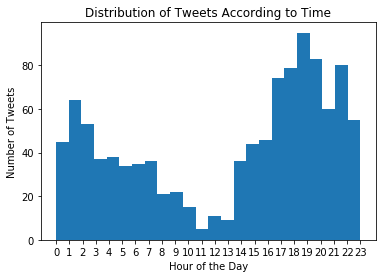

In [262]:

plt.hist(elon["Hour"],bins=24)

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Tweets According to Time")

plt.xticks(np.arange(min(elon["Hour"]), max(elon["Hour"])+1, 1.0))

plt.show()
